In [1]:
import pandas as pd
import numpy as  np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PATH = '/kaggle/input/pima-indians-diabetes-database/diabetes.csv'

In [3]:
data_df = pd.read_csv(PATH)

In [4]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
data_df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data_df[['Pregnancies','Outcome']].groupby(
['Pregnancies'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

,Pregnancies,Outcome
16,17,1.000000
15,15,1.000000
14,14,1.000000
9,9,0.642857
11,11,0.636364
8,8,0.578947
7,7,0.555556
13,13,0.500000
12,12,0.444444
10,10,0.416667


<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

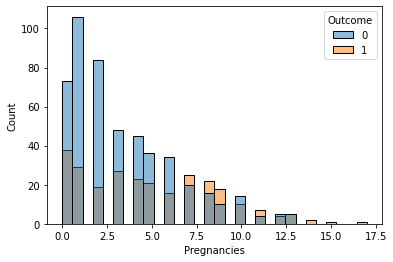

In [10]:
sns.histplot(data=data_df, x="Pregnancies",hue='Outcome',bins=30)

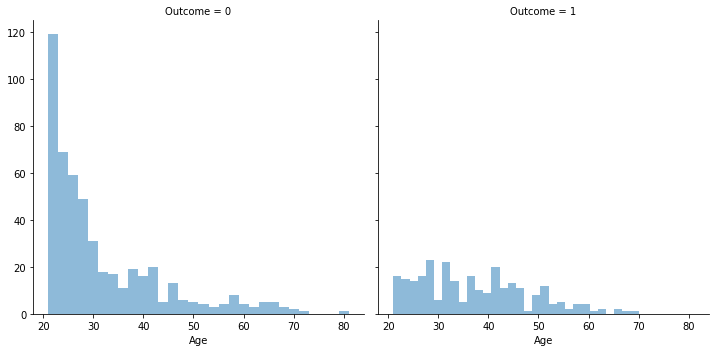

In [11]:
grid = sns.FacetGrid(data_df, col='Outcome',height=5,aspect=1)
grid.map(plt.hist,'Age',alpha=.5, bins=30)
grid.add_legend()

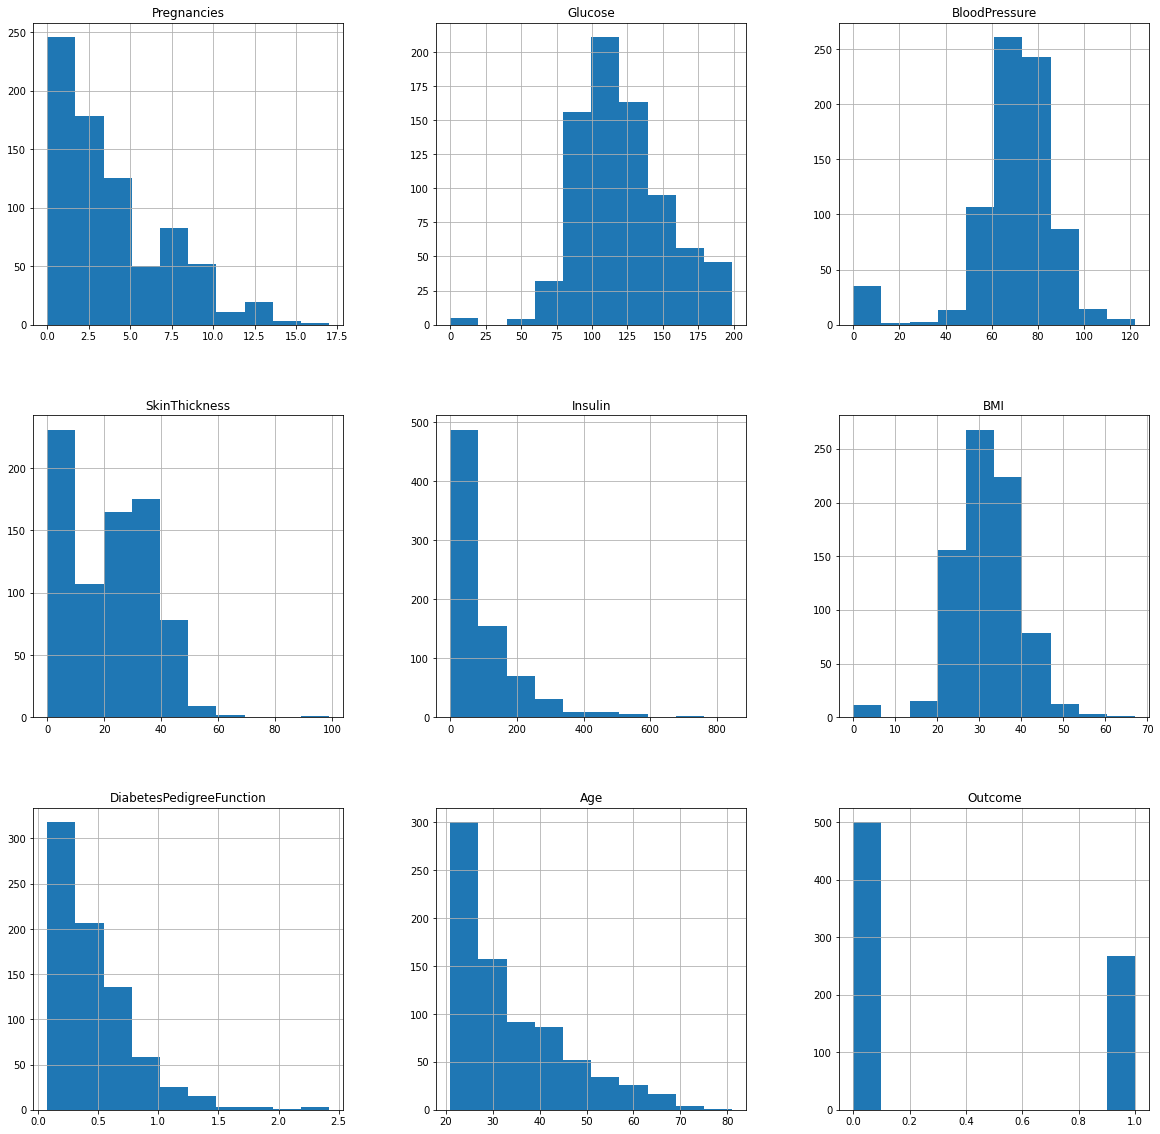

In [12]:
p = data_df.hist(figsize = (20,20))

In [13]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#Replace Zeroes By Nans
x= data_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
x =x.replace(0,np.NaN)
data_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=x

In [15]:
data_df.isnull().sum().sort_values(ascending=False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Pregnancies                   0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
data_df['Glucose'].fillna(
    data_df['Glucose'].mean(), inplace = True)
data_df['BloodPressure'].fillna(
    data_df['BloodPressure'].mean(), inplace = True)
data_df['SkinThickness'].fillna(
    data_df['SkinThickness'].median(), inplace = True)
data_df['Insulin'].fillna(
    data_df['Insulin'].median(), inplace = True)
data_df['BMI'].fillna(
    data_df['BMI'].median(), inplace = True)

In [17]:
data_df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
data_df.head(80).T

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000000,2.000,8.000,...,2.000,5.000,13.000,4.000,1.000,1.000000,7.000,5.00,0.000000,2.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000000,197.000,125.000,...,100.000,139.000,126.000,129.000,79.000,121.686763,62.000,95.00,131.000000,112.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,72.405184,70.000,96.000,...,66.000,64.000,90.000,86.000,75.000,48.000000,78.000,72.00,72.405184,66.000
SkinThickness,35.000,29.000,29.000,23.000,35.000,29.000,32.000,29.000000,45.000,29.000,...,20.000,35.000,29.000,20.000,30.000,20.000000,29.000,33.00,29.000000,22.000
Insulin,125.000,125.000,125.000,94.000,168.000,125.000,88.000,125.000000,543.000,125.000,...,90.000,140.000,125.000,270.000,125.000,125.000000,125.000,125.00,125.000000,125.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300000,30.500,32.300,...,32.900,28.600,43.400,35.100,32.000,24.700000,32.600,37.70,43.200000,25.000
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134000,0.158,0.232,...,0.867,0.411,0.583,0.231,0.396,0.140000,0.391,0.37,0.270000,0.307
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000000,53.000,54.000,...,28.000,26.000,42.000,23.000,22.000,22.000000,41.000,27.00,26.000000,24.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000000,1.000,1.000,...,1.000,0.000,1.000,0.000,0.000,0.000000,0.000,0.00,1.000000,0.000


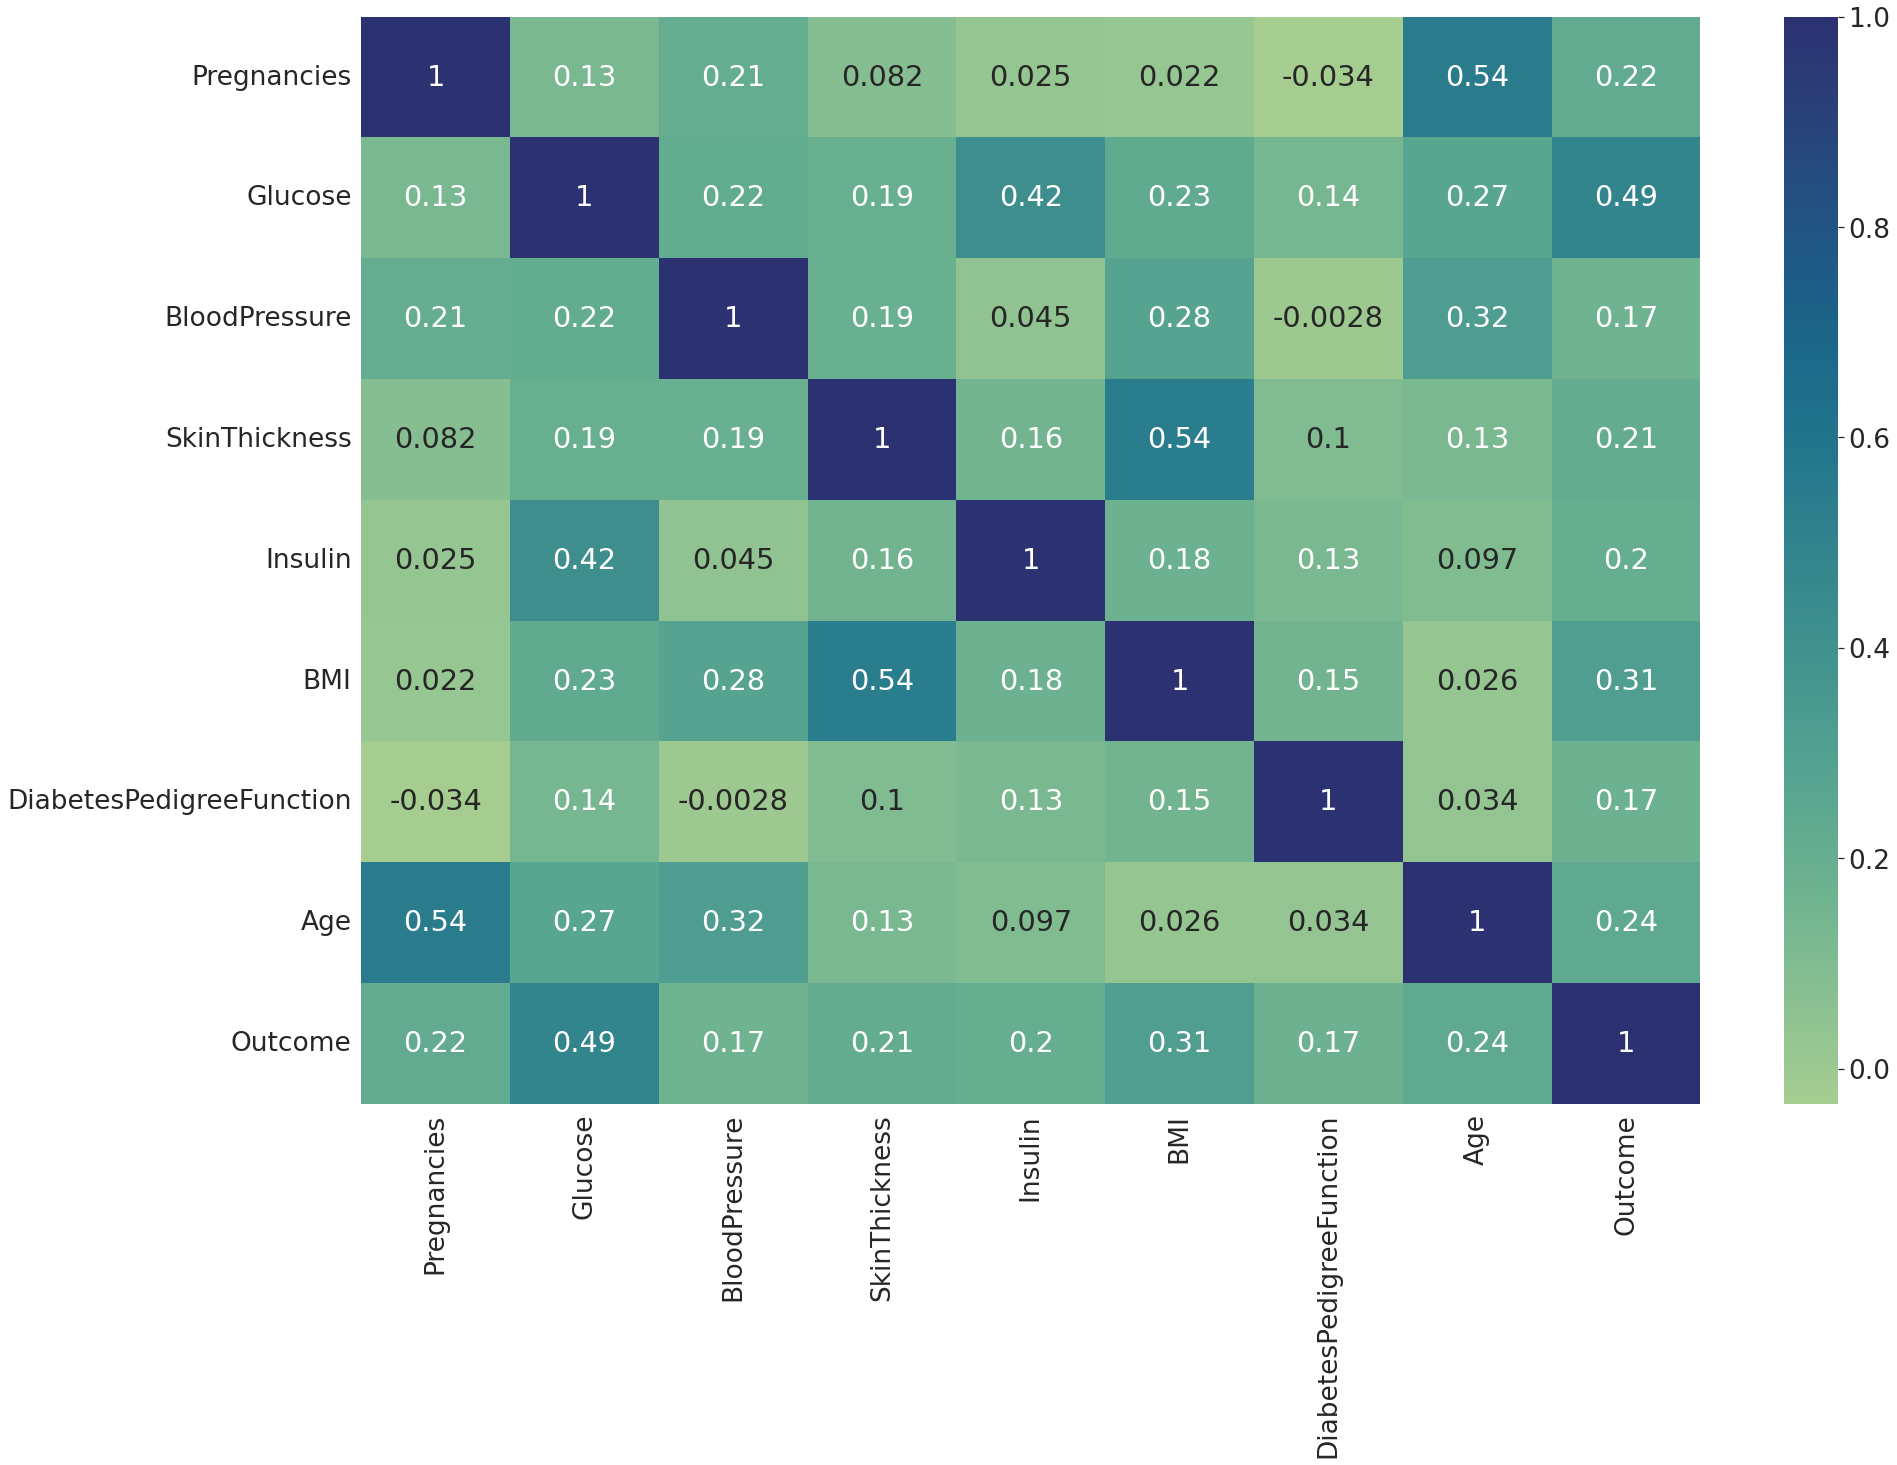

In [19]:
sns.set(font_scale=2.4)
plt.figure(figsize=(30,20))
plot = sns.heatmap(data_df.corr(), annot=True, cmap="crest")

In [20]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [21]:
#standarization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(data_df.drop(['Outcome'],axis=1),),
                columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [22]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [23]:
y= data_df['Outcome']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42,stratify=y)

In [25]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [26]:
# k =1 
knn = KNeighborsClassifier(1)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.73046875

In [27]:
# k =3
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.74609375

In [28]:
# k =5  
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7421875

In [29]:
# k =7
knn = KNeighborsClassifier(7)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.74609375

In [30]:
# k =9
knn = KNeighborsClassifier(9)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.74609375

In [31]:
# k =11
knn = KNeighborsClassifier(11)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)
#The best accuracy when k=11

0.765625